# Deep Q Learning Network

Instantiating the framework and `Unity` agent.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
from src.agent import Agent
import torch
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def unwrap_env_info(obj):
    return obj.vector_observations[0], obj.rewards[0], obj.local_done[0]

In [2]:
env =  (file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Examine the State and Action Spaces

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
env_info = env.reset(train_mode=True)[brain_name]

print(f'Number of agents: {len(env_info.agents)}')

action_size = brain.vector_action_space_size
print(f'Number of actions {action_size}')

state = env_info.vector_observations[0]
print('States look like:', state)

state_size = len(state)
print(f'States have length {state_size}')

Number of agents: 1
Number of actions 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length 37


In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=25)

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """ Deep Q-Learning
    Params
    =====
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): first value of epsilon (for epsilon-greedy selection)
        eps_end (float): minimum value of epsilon
        eps_decay (float): the decay rate of epsilon per episode
    """
    
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.resetin_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state, reward, done = unwrap_env_info(env_info)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_decay*eps, eps_end)
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end='')
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')
        
        if np.mean(scores_window) >= 25:
            print(f'\nEnvironment Solved in {i_episode-100} episodes!\tAverag Score: {np.mean(scores_window):.2f}')
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

Episode 100	Average Score: 0.99
Episode 200	Average Score: 3.94
Episode 300	Average Score: 6.97
Episode 400	Average Score: 10.30
Episode 500	Average Score: 13.03
Episode 600	Average Score: 14.47
Episode 700	Average Score: 14.70
Episode 717	Average Score: 15.01
Environment Solved in 617 episodes!	Average Score: 15.01


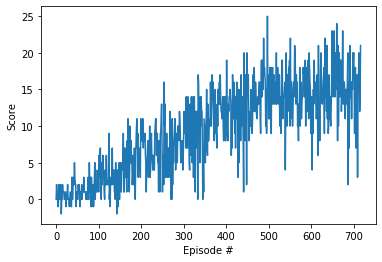

In [8]:
scores = dqn()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
env.close()

# Watch the agent play!

Watching the smart agent to catch yellow bananas.

In [3]:
env = UnityEnvironment(file_name='Banana.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
env_info = env.reset(train_mode=False)[brain_name]

state = env_info.vector_observations[0]
state_size = len(state)
action_size = brain.vector_action_space_size

agent = Agent(state_size=state_size, action_size=action_size, seed=25)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

score = 0

while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state, reward, done = unwrap_env_info(env_info)
    score += reward
    state = next_state
    
    if done:
        break
        
print(f'Score: {score}')

Score: 14.0


In [6]:
env.close()